# Insurance Fraud Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d = pd.read_csv('claim.csv')

In [3]:
df = pd.DataFrame(d)

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Total rows =1000
 Total columns = 40
    
21 = object datatype

17 = int datatype

2 float datatype

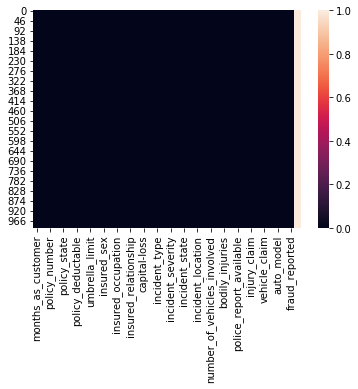

In [6]:
sns.heatmap(df.isnull())

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

All the values in _c39 are null therefore dropping it

In [8]:
df.drop('_c39',axis=1,inplace=True)

In [9]:
numerical_f = [i for i in df if df[i].dtypes!='O']

In [10]:
numerical_f

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

In [11]:
categorical_f = [i for i in df if df[i].dtypes=='O']

In [12]:
categorical_f

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

Numerical and categorical variable are seperated

Univariate Analysis of categorical variables

In [13]:
for i in categorical_f:
    print(i)
    print(df[i].value_counts())
    print('------------------')

policy_bind_date
05-08-1992    3
28-04-1992    3
01-01-2006    3
21-12-2002    2
22-08-1991    2
             ..
13-06-1992    1
29-11-1999    1
06-03-2004    1
17-08-1991    1
12-01-2012    1
Name: policy_bind_date, Length: 951, dtype: int64
------------------
policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
------------------
policy_csl
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
------------------
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
------------------
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
------------------
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-servic

colision type , property damage , police report available are the columns with unknown category '?'

police_report_available


?      343

NO     343

YES    314

property_damage

?      360

NO     338

YES    302

collision_type

Rear Collision     292

Side Collision     276

Front Collision    254

?                  178






In [14]:
df.replace('?',np.NaN)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


Replacing '?' category with nan values

In [15]:
df = df.replace('?',np.NaN)

In [16]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [17]:
features_with_nan = [i for i in  df if df[i].isnull().sum()>1]

In [18]:
features_with_nan

['collision_type', 'property_damage', 'police_report_available']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lab_en = LabelEncoder()

In [21]:
df['fraud_reported'] = lab_en.fit_transform(df['fraud_reported'])

Creating new category for '?' because replacing with mode will imbalance the data as 30% (app.) rows has to be replace

In [22]:
df['collision_type'] = np.where(df['collision_type'].isnull(),'missing_collisiontype',df['collision_type'])

In [23]:
df['property_damage'] = np.where(df['property_damage'].isnull(),'missing_property_damage',df['property_damage'])

In [24]:
df['police_report_available'] = np.where(df['police_report_available'].isnull(),'missing_police_report',df['police_report_available'])

In [25]:
temporal_features=[]
for i in df.columns:
    if('date' in i or 'year' in i or 'Year' in i):
        temporal_features.append(i)
    else:
        pass
        
    

In [26]:
temporal_features

['policy_bind_date', 'incident_date', 'auto_year']

Dataset has the record of year 2015 incidents

In [27]:
df['incident_date'].value_counts()

02-02-2015    28
17-02-2015    26
07-01-2015    25
10-01-2015    24
24-01-2015    24
04-02-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
22-02-2015    20
12-02-2015    20
06-02-2015    20
31-01-2015    20
14-01-2015    19
01-01-2015    19
12-01-2015    19
21-02-2015    19
23-02-2015    19
21-01-2015    19
01-02-2015    18
18-01-2015    18
25-02-2015    18
03-01-2015    18
28-02-2015    18
14-02-2015    18
20-01-2015    18
24-02-2015    17
06-01-2015    17
09-01-2015    17
26-02-2015    17
08-02-2015    17
15-02-2015    16
05-02-2015    16
16-01-2015    16
13-02-2015    16
16-02-2015    16
17-01-2015    15
28-01-2015    15
15-01-2015    15
18-02-2015    15
22-01-2015    14
20-02-2015    14
27-02-2015    14
27-01-2015    13
23-01-2015    13
09-02-2015    13
03-02-2015    13
01-03-2015    12
04-01-2015    12
02-01-2015    11
29-01-2015    11
26-01-2015    11
10-02-2015    10
07-02-2015    10
25-01-2015    10
19-02-2015    10
11-02-2015    10
11-01-2015    

In [28]:
df['auto_year'].value_counts()

1995    56
1999    55
2005    54
2011    53
2006    53
2007    52
2003    51
2010    50
2009    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64

Policy bind date has 951 unique values

In [29]:
df['policy_bind_date'].value_counts()

05-08-1992    3
28-04-1992    3
01-01-2006    3
21-12-2002    2
22-08-1991    2
             ..
13-06-1992    1
29-11-1999    1
06-03-2004    1
17-08-1991    1
12-01-2012    1
Name: policy_bind_date, Length: 951, dtype: int64

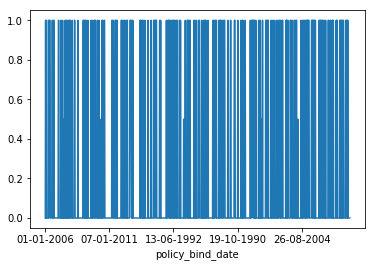

In [30]:
df.groupby('policy_bind_date')['fraud_reported'].median().plot()

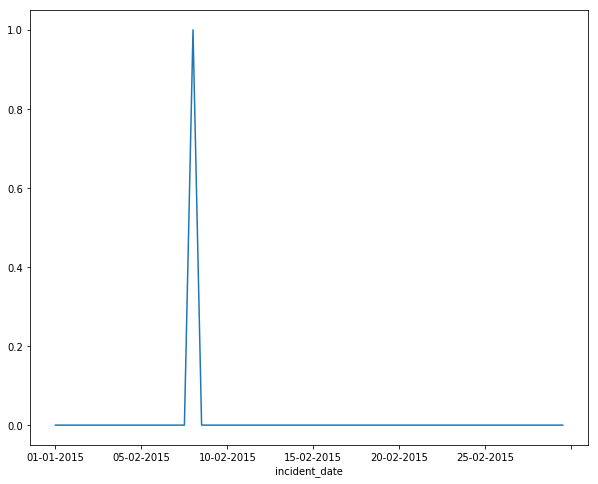

In [222]:
plt.figure(figsize=(10,8))
datas.groupby('incident_date')['fraud_reported'].median().plot()

Most of the incident happened between 6-02-2015 to 9-02-2015

In [33]:
df['auto_year'] = pd.to_datetime(df['auto_year'])

In [34]:
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [35]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

In [36]:
df['incident_date_day']  = df['incident_date'].dt.day

In [37]:
df['incident_date_month']  = df['incident_date'].dt.month

In [38]:
df['auto_year_'] = df['auto_year'].dt.year

In [39]:
df['policy_bind_date_day']  = df['policy_bind_date'].dt.day

In [40]:
df['policy_bind_date_month']  = df['policy_bind_date'].dt.month

In [41]:
df['policy_bind_date_year']  = df['policy_bind_date'].dt.year

In [48]:
numerical_f = [i for i in df if df[i].dtypes!='O']

In [49]:
numerical_f

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 'fraud_reported',
 'incident_date_day',
 'incident_date_month',
 'auto_year_',
 'policy_bind_date_day',
 'policy_bind_date_month',
 'policy_bind_date_year']

In [127]:
list_conti = ['months_as_customer','age','policy_annual_premium','umbrella_limit','insured_zip','capital-gains','capital-loss','total_claim_amount','injury_claim','vehicle_claim']

In list_conti sepearated the columns with continous values because are some features with discreate values like:
    
Vehicle involved  , boldily injuries

months_as_customer


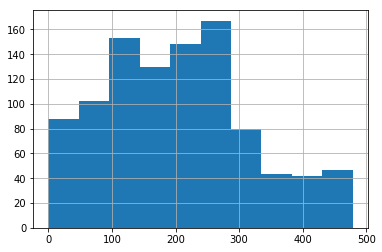

age


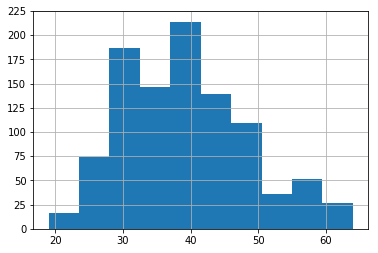

policy_number


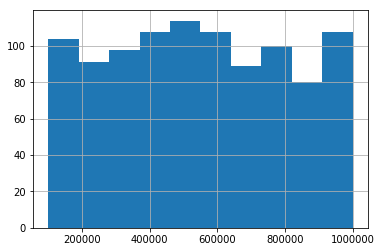

policy_bind_date


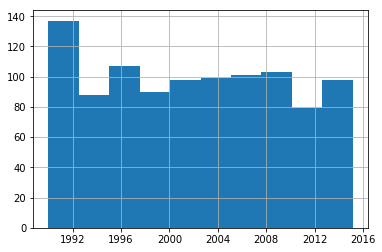

policy_deductable


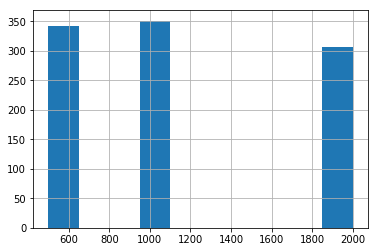

policy_annual_premium


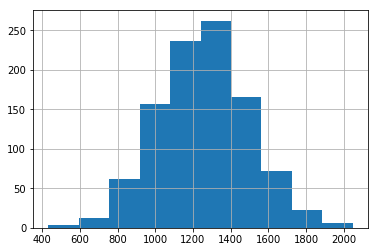

umbrella_limit


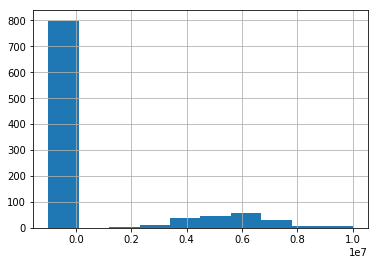

insured_zip


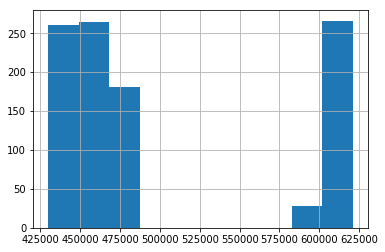

capital-gains


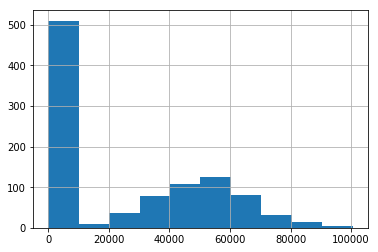

capital-loss


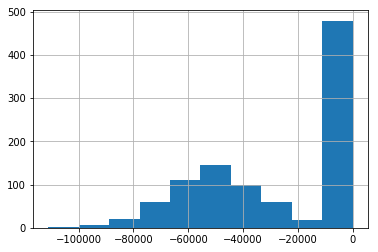

incident_date


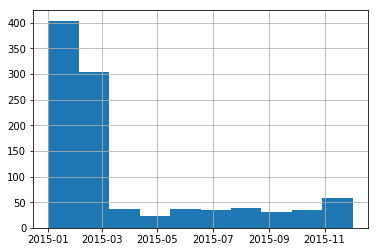

incident_hour_of_the_day


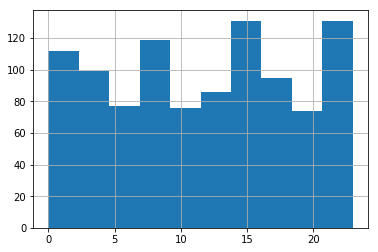

number_of_vehicles_involved


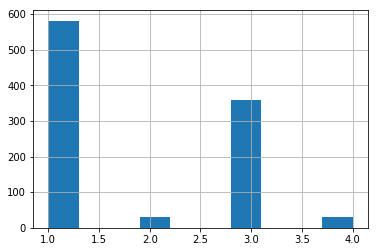

bodily_injuries


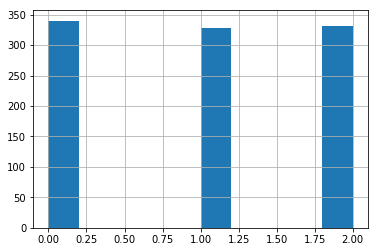

witnesses


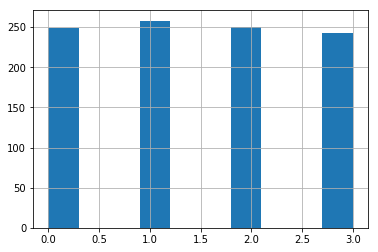

total_claim_amount


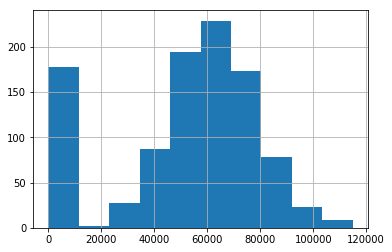

injury_claim


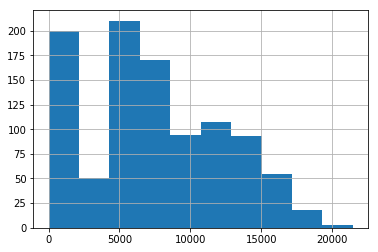

property_claim


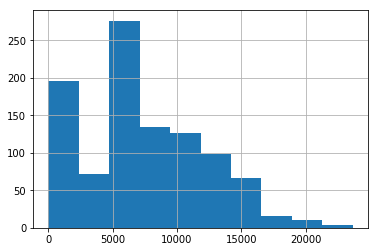

vehicle_claim


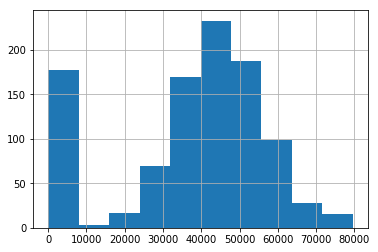

auto_year


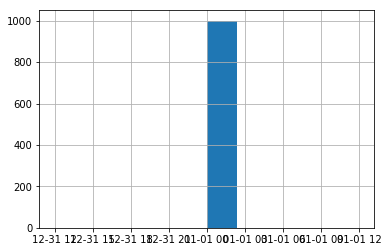

fraud_reported


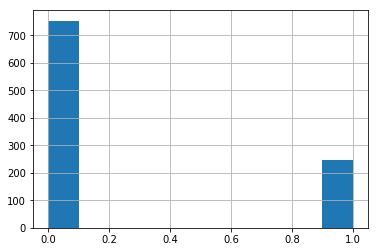

incident_date_day


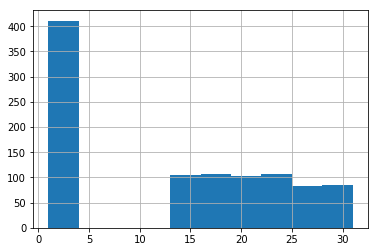

incident_date_month


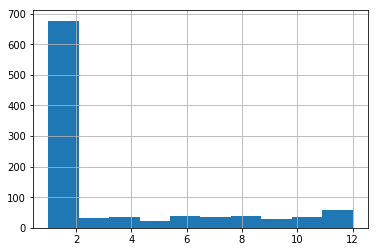

auto_year_


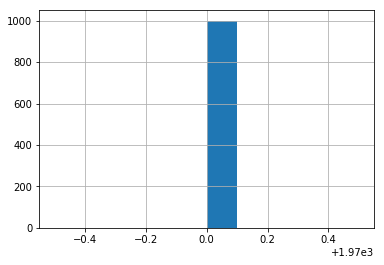

policy_bind_date_day


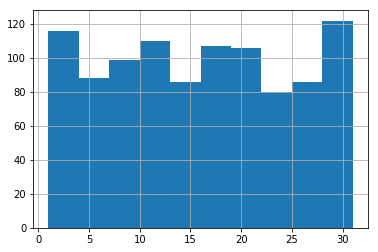

policy_bind_date_month


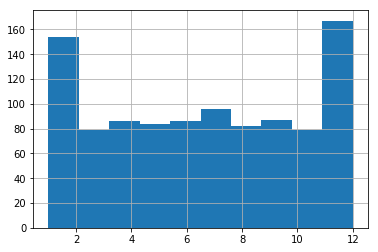

policy_bind_date_year


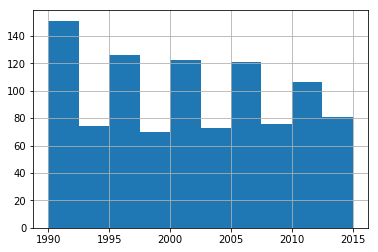

In [51]:
for i in numerical_f:
    print(i)
    df[i].hist()
    plt.show()

Age of people lies between 18 to 63 (max near 40)

policy premium ranges from 600 to 2000

Total claim amount ranges from(0 to 1100000) 

Maximum people lies in range of (60k) for claim

Total vehicle involved (1 to 4) most of the incident involves 1 vehcile

Total witness (0 to 3)





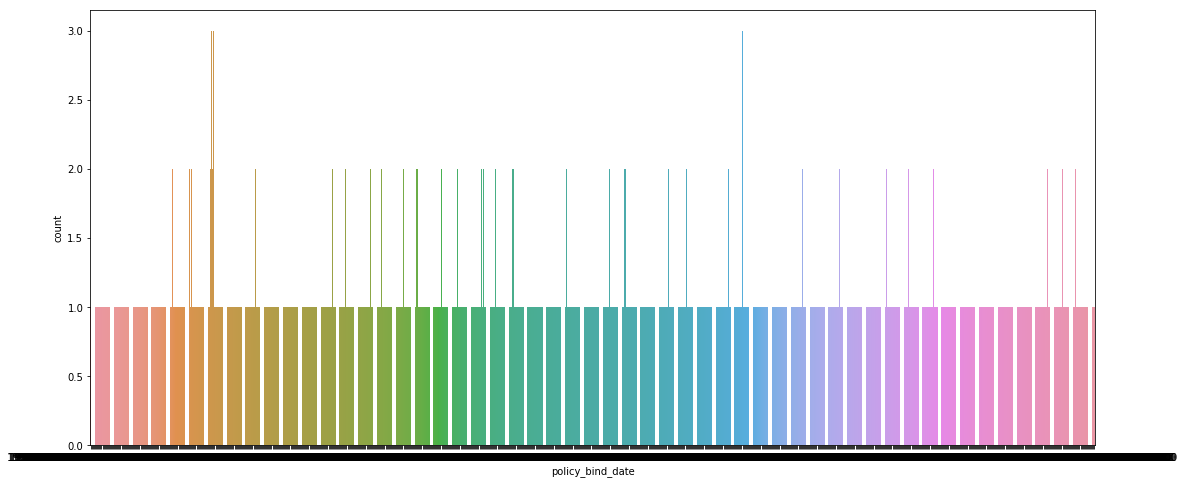

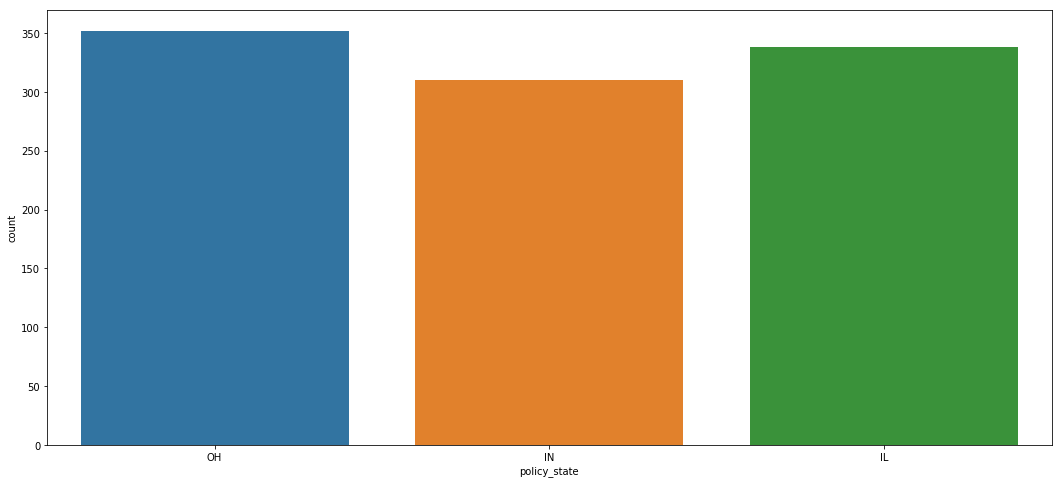

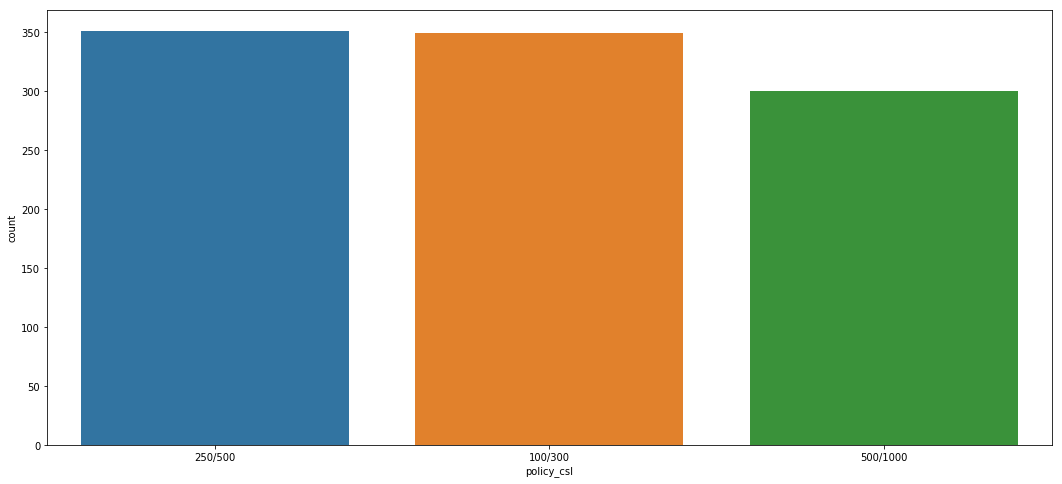

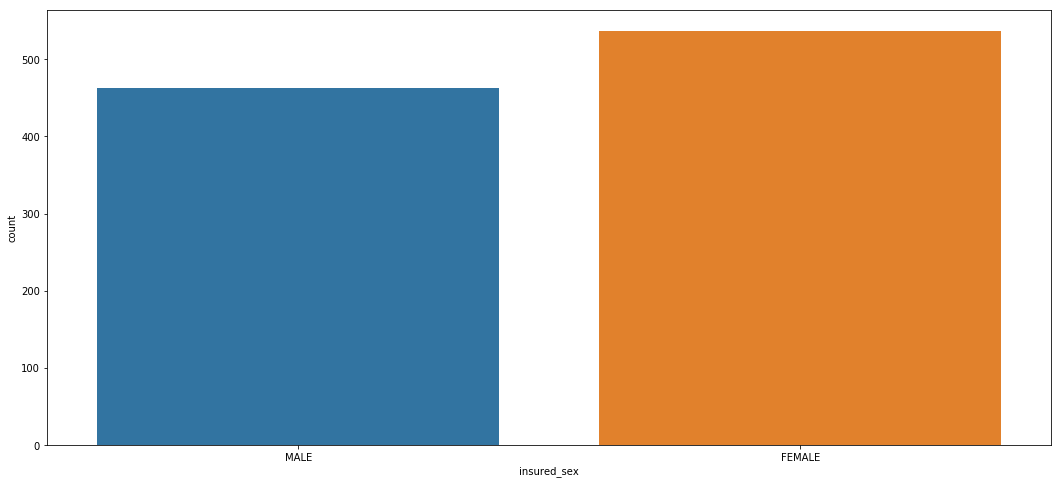

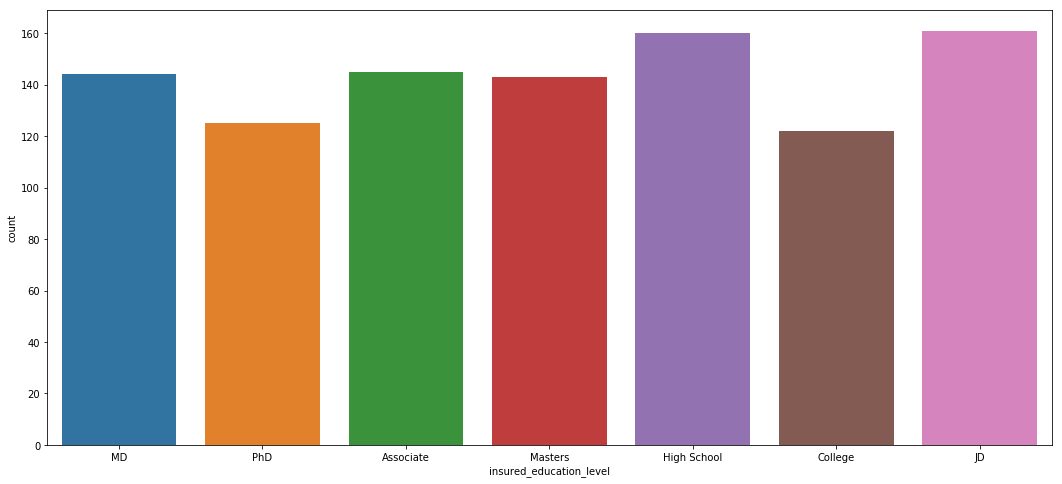

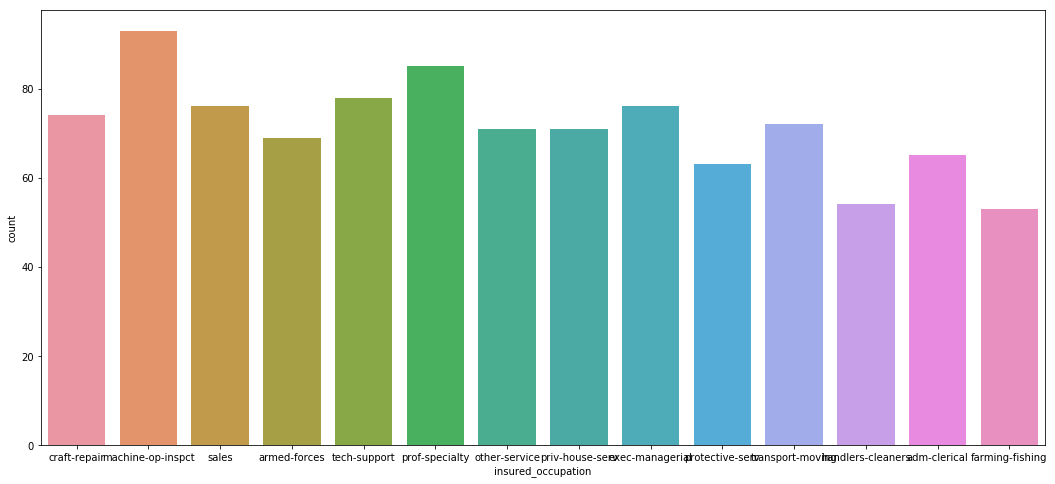

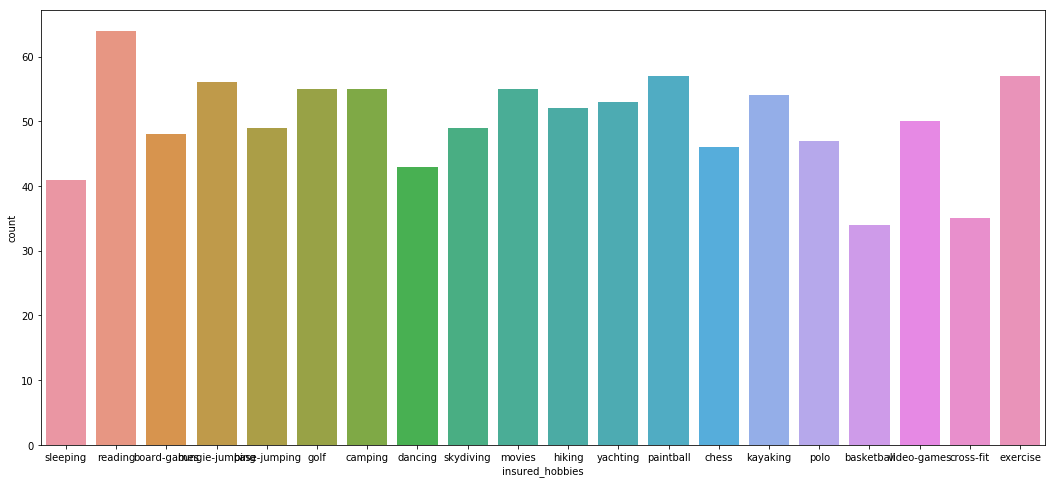

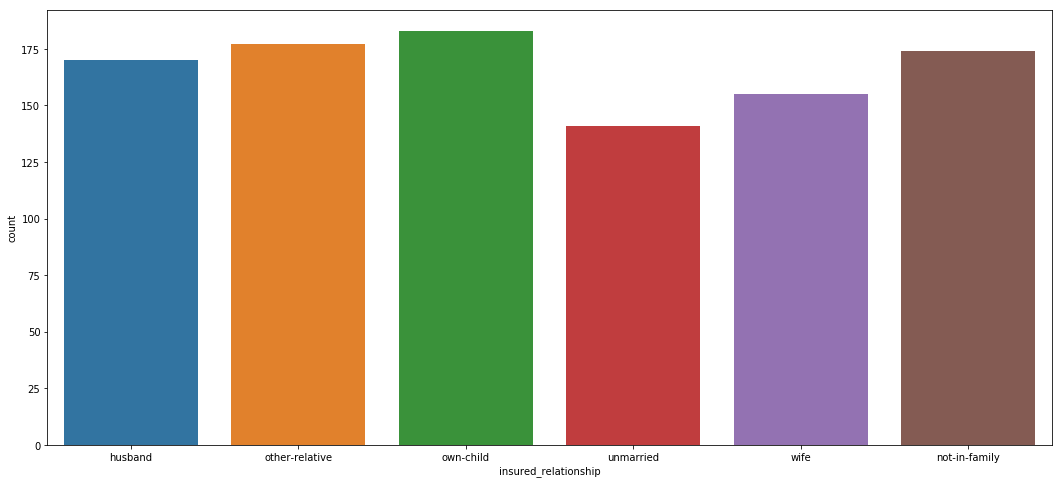

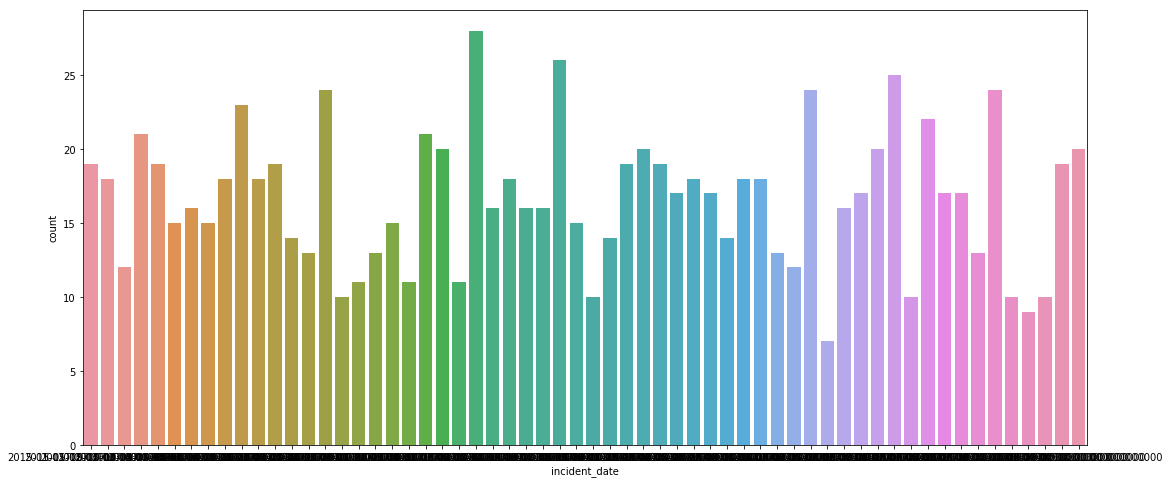

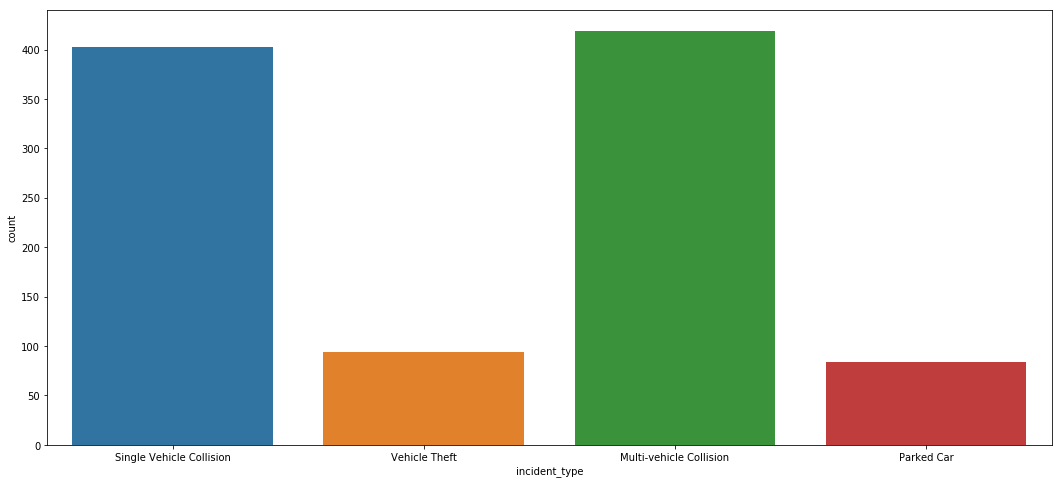

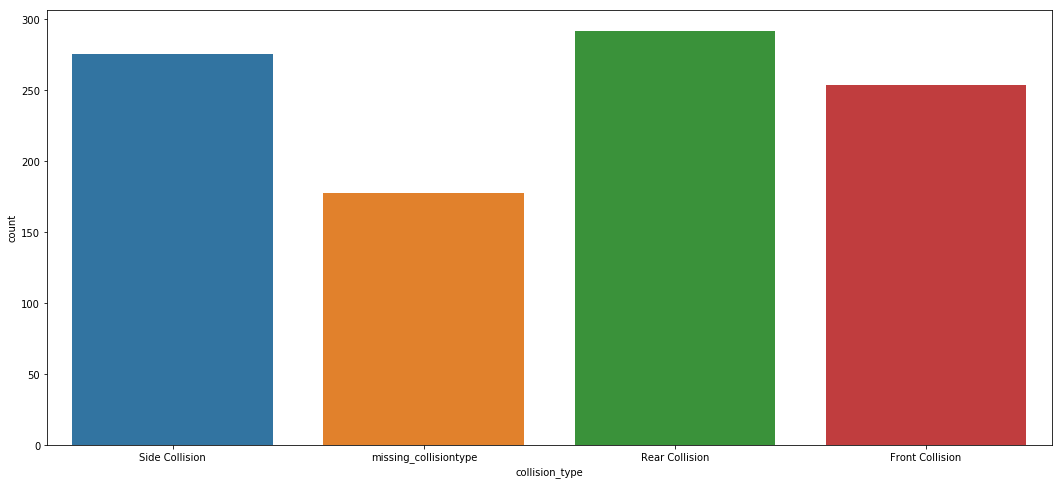

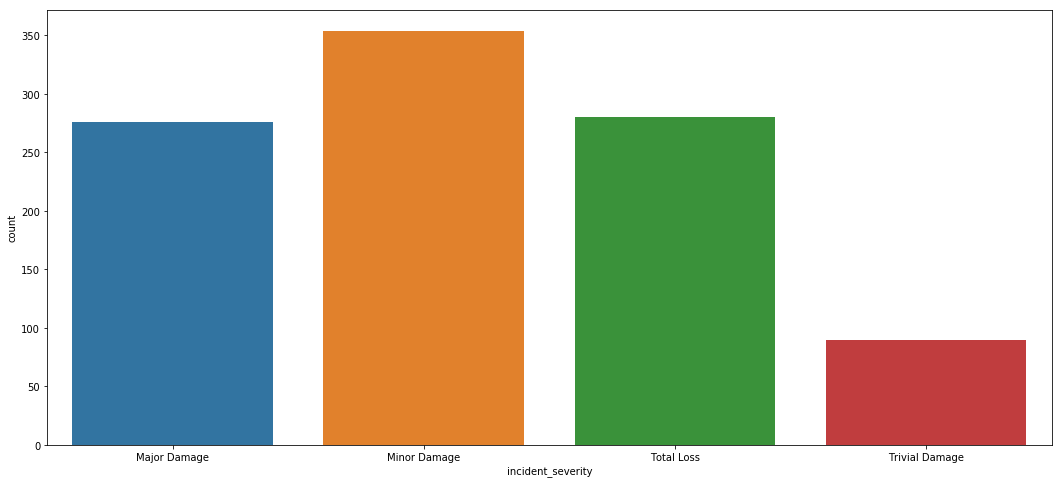

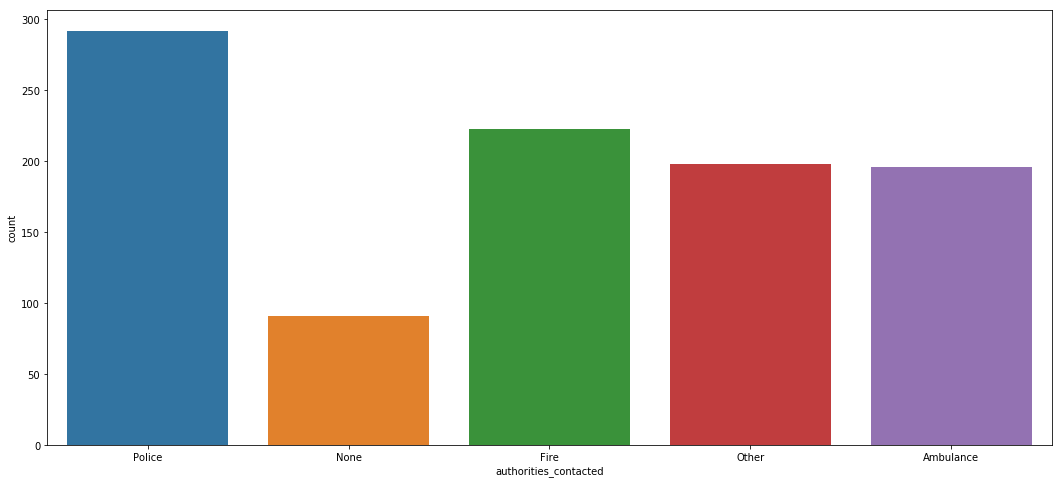

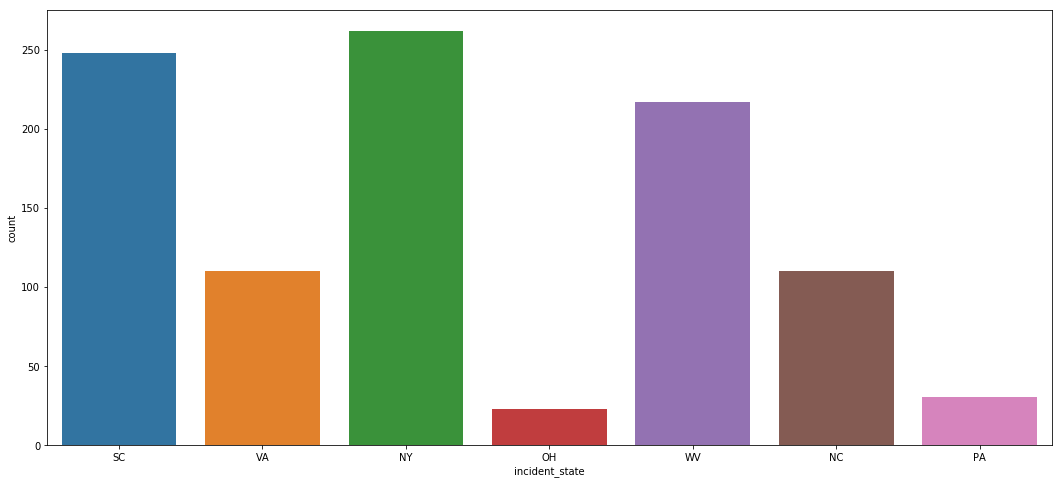

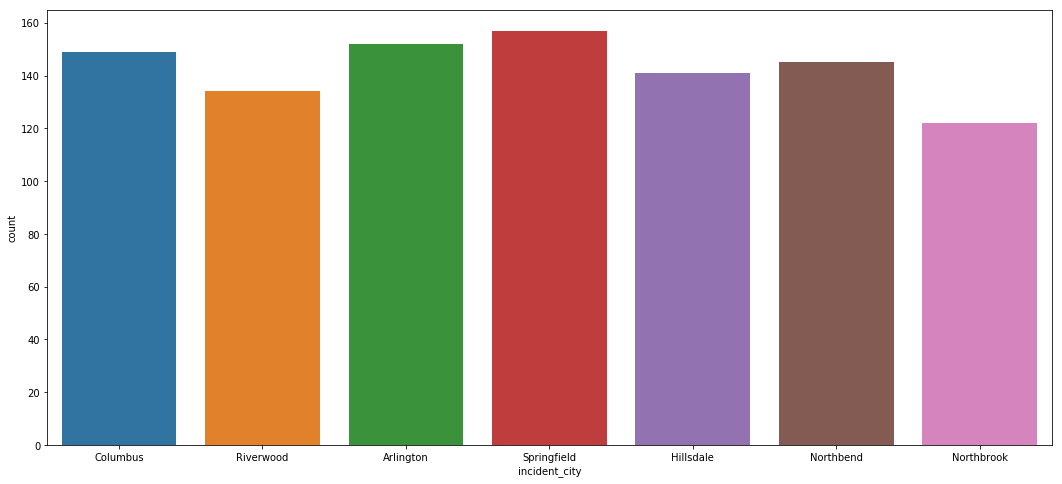

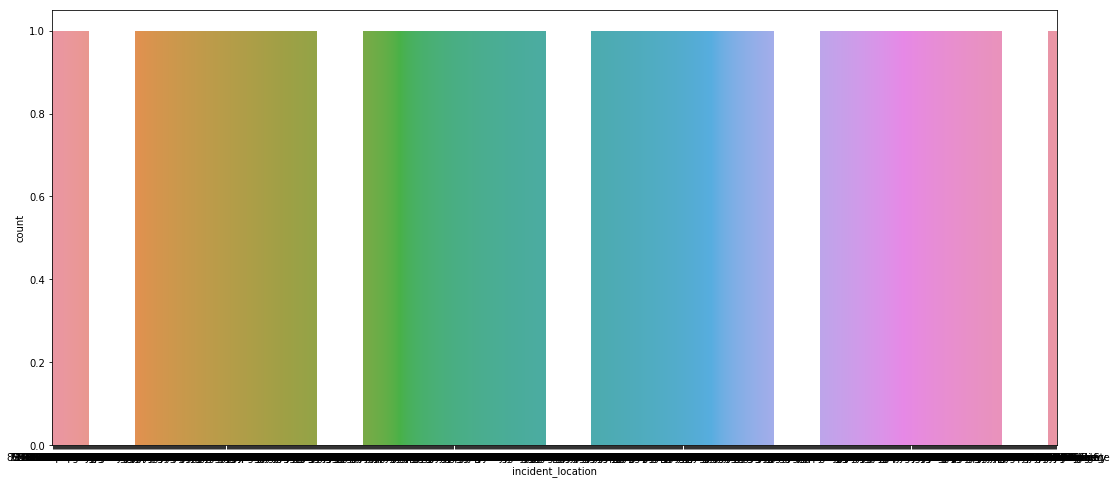

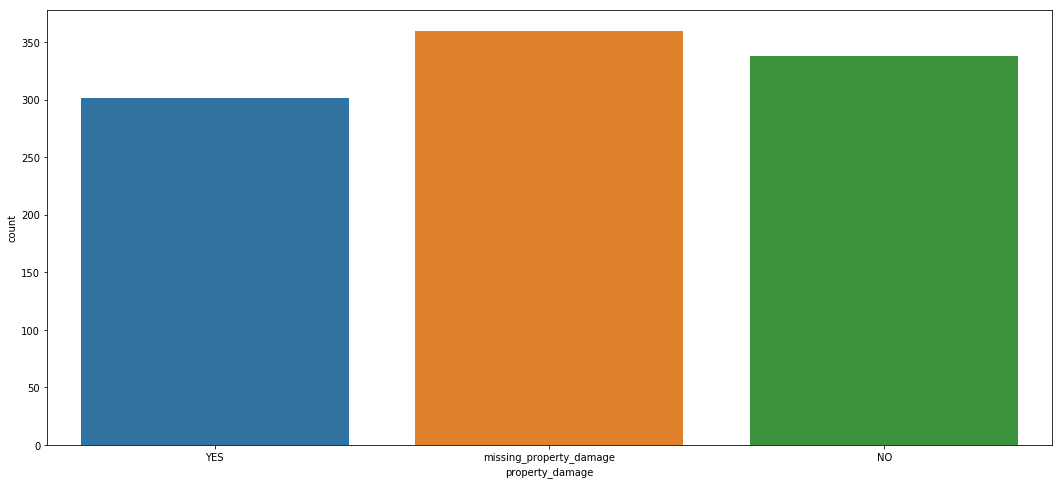

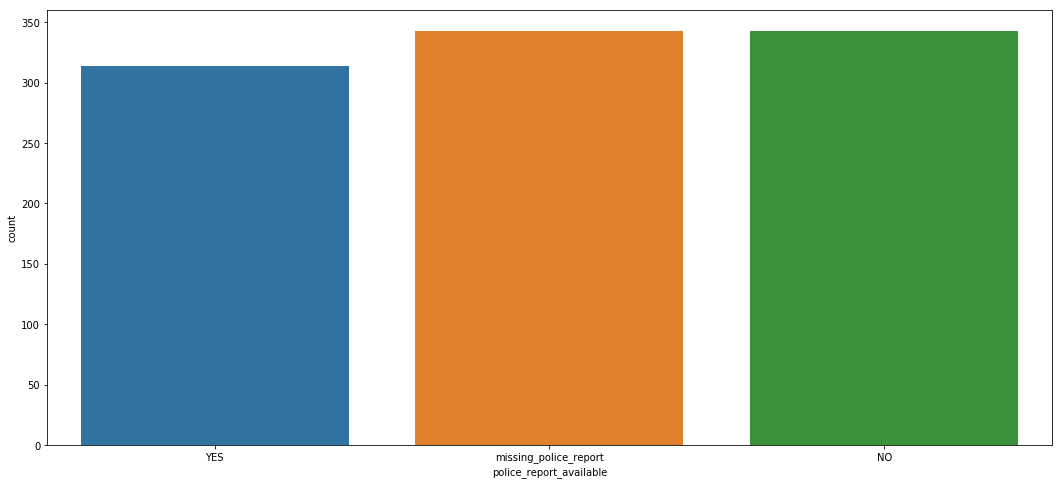

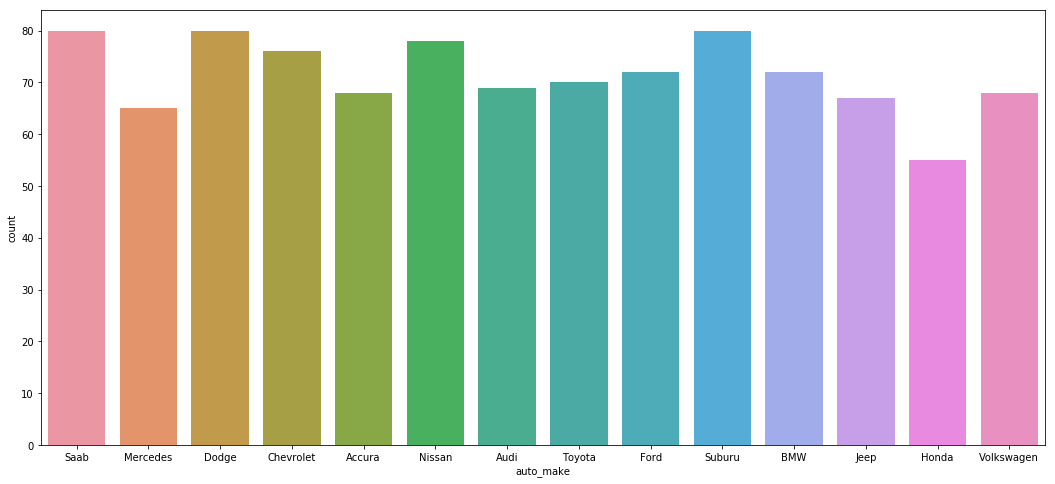

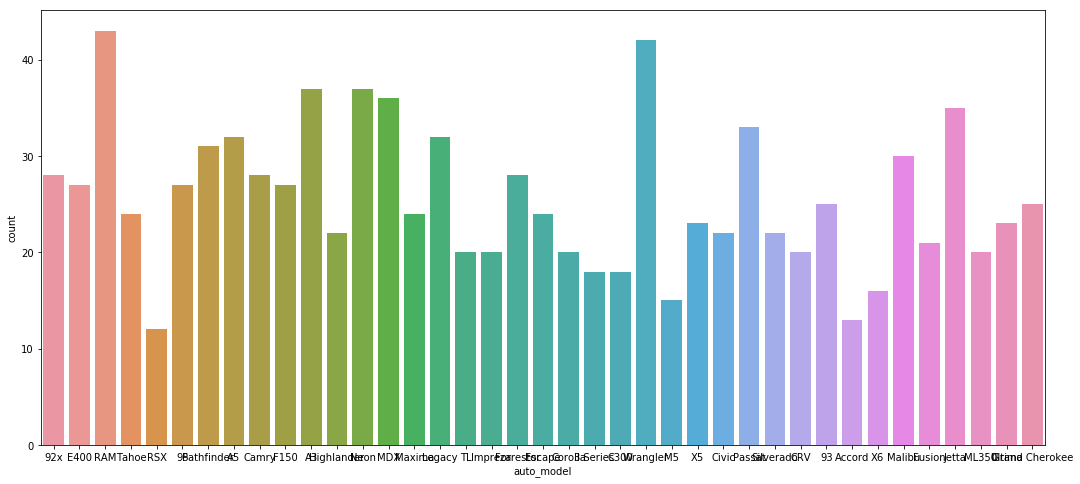

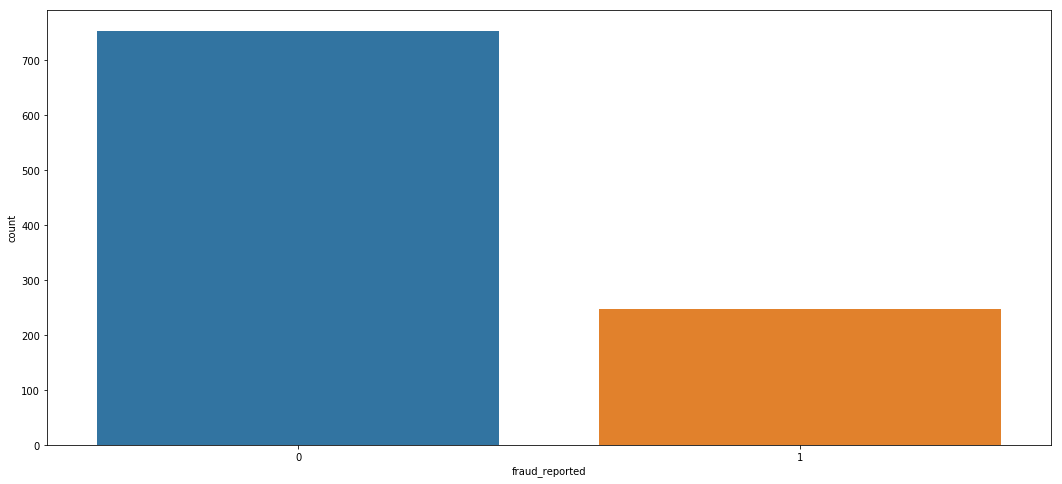

In [54]:
for i in categorical_f:
    plt.figure(figsize=(18,8))
    sns.countplot(df[i])
    plt.show()

Observation :
    
1. about Insured people:
    
Most of the insured people are from high school educational type , occupation is machine-op , relation = own child

2. incident type:
    
Most frequenct incident type is multi vehicle collision and rear collision , authorities contacted is police

2. location:
    
Frequent incident state = New york

City = springfield
    


    


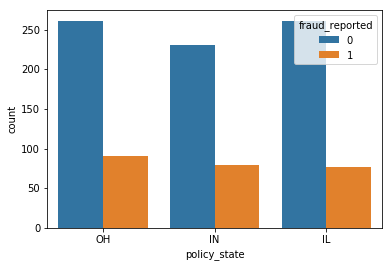

In [61]:
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

Almost equal yes fraud reported for the policy states

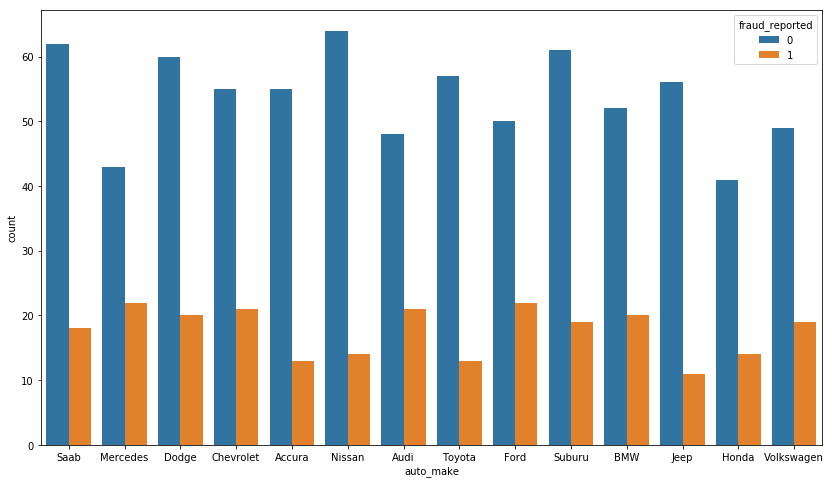

In [64]:
plt.figure(figsize=(14,8))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

Mercedes reports highest fraud claims

Jeep reports least fraud claims irrespective of total cases

On the basis of total cases:
    
Honda reports highest fraud claims

Nissan reports least

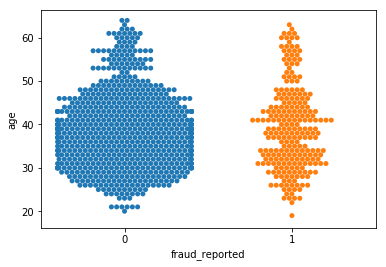

In [65]:
sns.swarmplot(x='fraud_reported',y='age',data=df)

People between age 30 to 40 lies in genuine claims

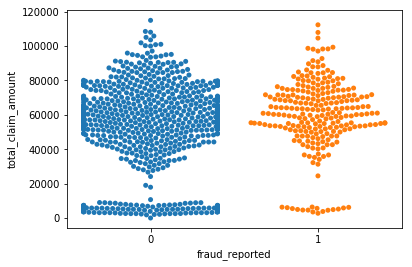

In [70]:
sns.swarmplot(x='fraud_reported',y='total_claim_amount',data=df)

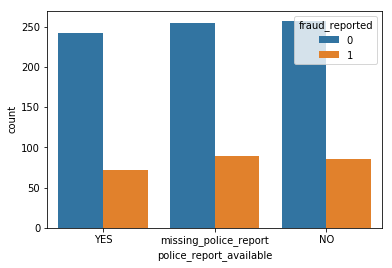

In [71]:
sns.countplot(x='police_report_available',hue='fraud_reported',data=df)

For both yes and no police report avail number of frauds are almost and 30% data was null

So we can say that in case of police report avail also there is same changes of fraud claims

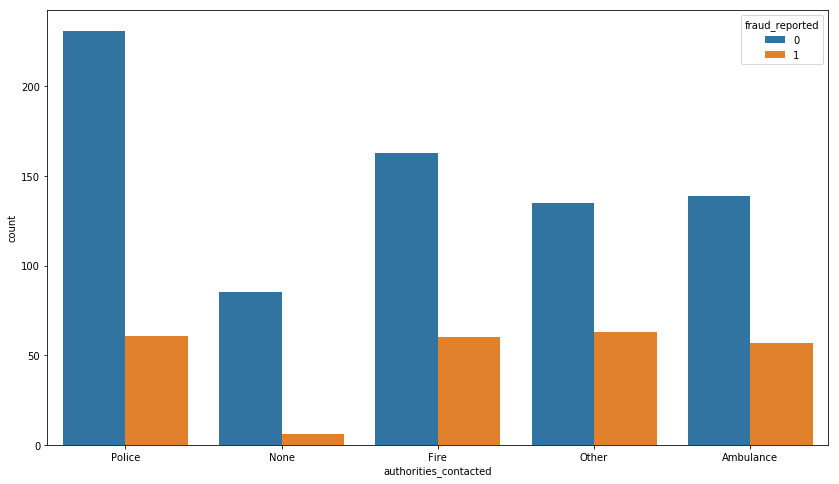

In [79]:
plt.figure(figsize=(14,8))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

Most frequenct authority contacted is police

On the basis of total cases:
    others reports highest fraud cases

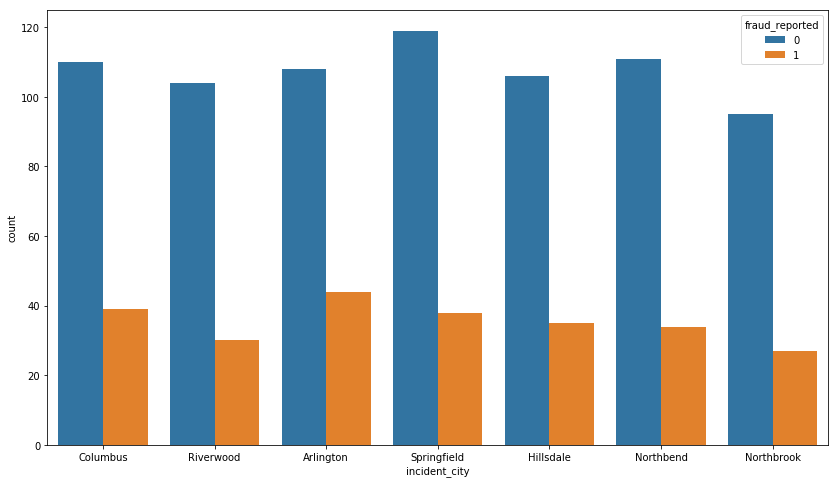

In [78]:
plt.figure(figsize=(14,8))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

Springfield is the city of highest number of incident

But Arlington reports highest fraud cases

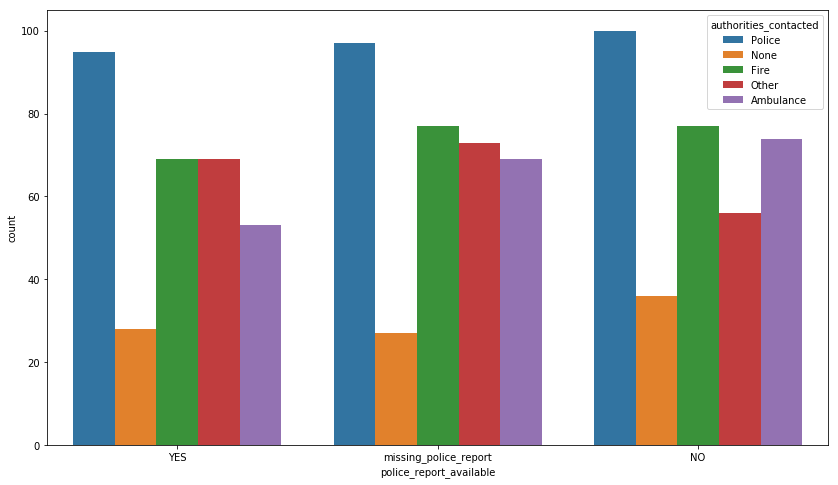

In [77]:
plt.figure(figsize=(14,8))
sns.countplot(x='police_report_available',hue='authorities_contacted',data=df)

Eventhough most frequent authority contacted is police : Police report availability is less compare to no

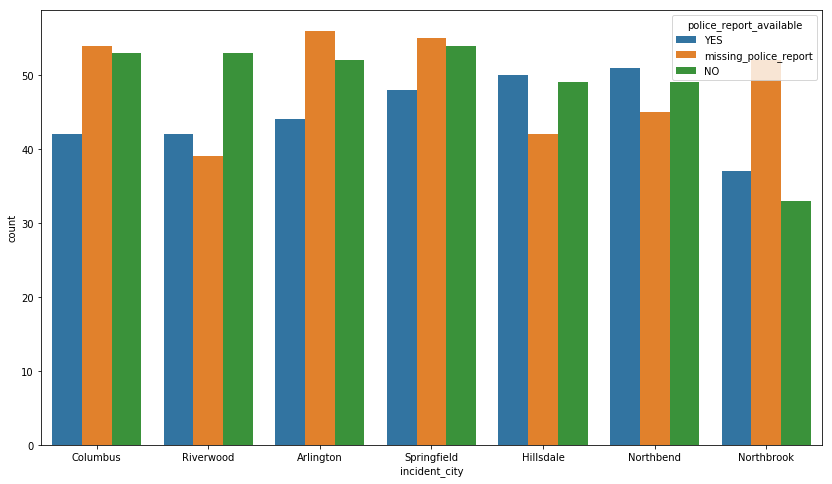

In [76]:
plt.figure(figsize=(14,8))
sns.countplot(x='incident_city',hue='police_report_available',data=df)

In Northbend cases has highest number of available police report

In Arlington it is least (also Arlington has highest fraud reported)

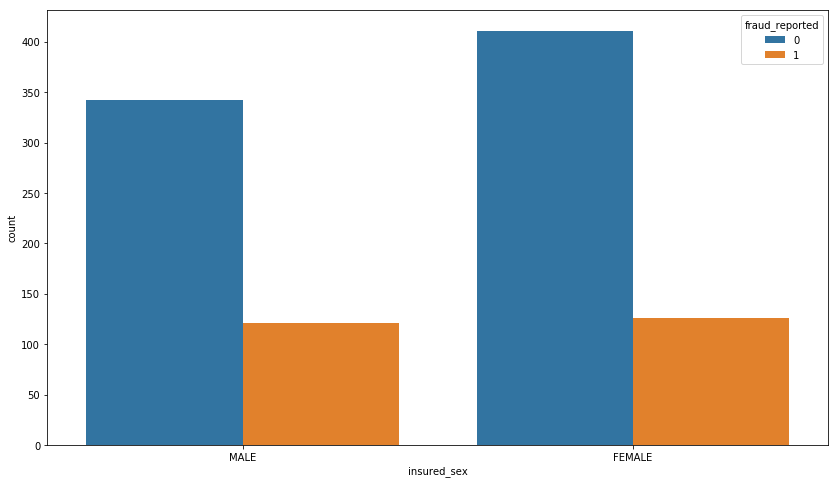

In [81]:
plt.figure(figsize=(14,8))
sns.countplot(x='insured_sex',hue='fraud_reported',data=df)

On the basis of total :
    
Male insured more than female

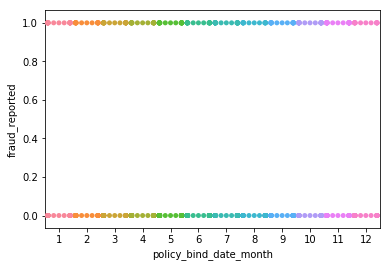

In [90]:
sns.swarmplot(x='policy_bind_date_month',y='fraud_reported',data=df)

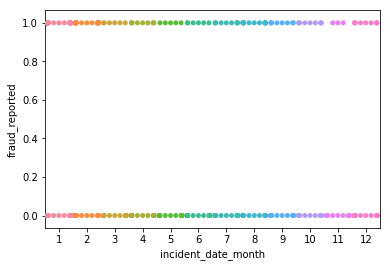

In [92]:
sns.swarmplot(x='incident_date_month',y='fraud_reported',data=df)

In [93]:
df.drop(['auto_year','incident_date','policy_bind_date'],axis=1,inplace=True)

Dropping his three features as values are fetched as month , year and day

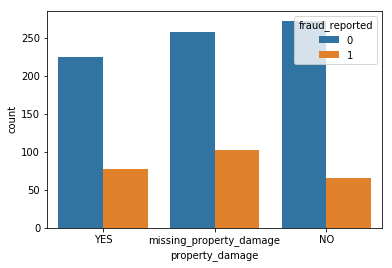

In [99]:
sns.countplot(x='property_damage',hue='fraud_reported',data=df)

Property damage =No shows less fraud cases

and yes shows more fraud cases on the basis of total cases

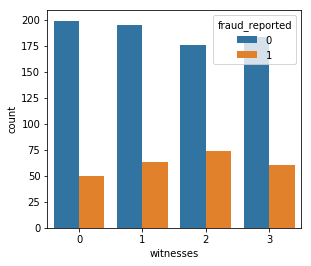

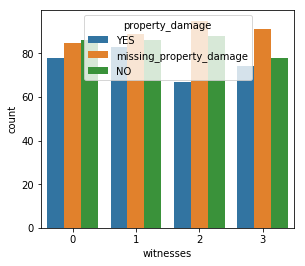

In [105]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='witnesses',hue='fraud_reported',data=df)
plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
sns.countplot(x='witnesses',hue='property_damage',data=df)

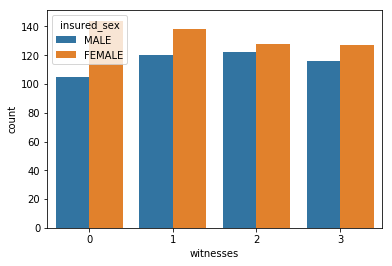

In [107]:
sns.countplot(x='witnesses',hue='insured_sex',data=df)

Witness = 2  shows highest fraud claims asloleast property damage

And with respect to gender female are more in witness = 2

Concluding:
    
Witness = 2 and females reports highest fraud claims

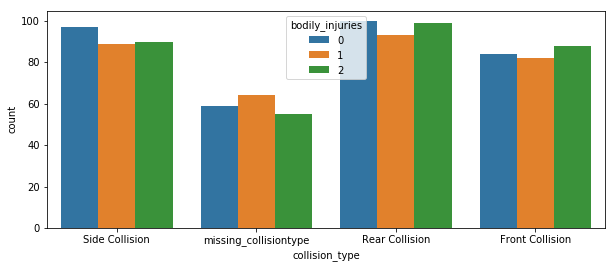

In [115]:
plt.figure(figsize=(10,4))
sns.countplot(x='collision_type',hue='bodily_injuries',data=df)

In the front collision bodily injuries are more

And in Rear collision bodily injuires are least 

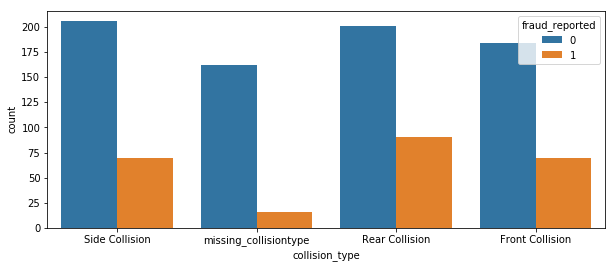

In [116]:
plt.figure(figsize=(10,4))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

Rear collision showing highest fraud reports as well as least bodily injured

We can say that In rear collision there is more probability of fraud reports

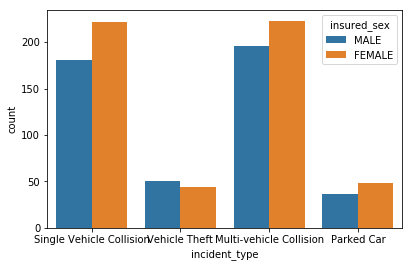

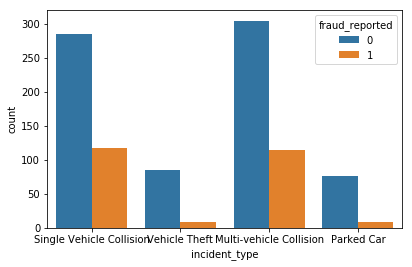

In [119]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.countplot(x='incident_type',hue='insured_sex',data=df)
plt.figure(figsize=(14,4))
plt.subplot(1,2,2)
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

Females are more in each incident type except vehicle theft

Single vehicle collision reports highest fraud cases

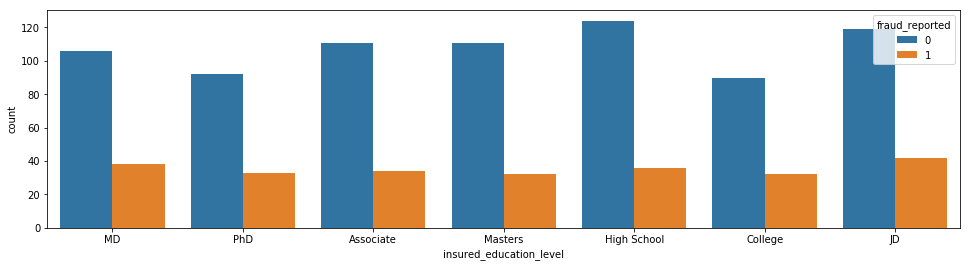

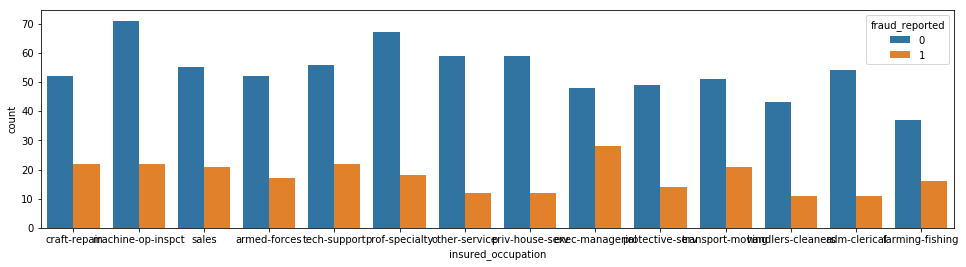

In [126]:
plt.figure(figsize=(36,4))
plt.subplot(1,2,1)
sns.countplot(x='insured_education_level',hue='fraud_reported',data=df)
plt.figure(figsize=(36,4))
plt.subplot(1,2,2)
sns.countplot(x='insured_occupation',hue='fraud_reported',data=df)

High schools reports highest claims

whereas JD reports highest fraud cases

Exec managerials reports highest frand reports (more than 55%)

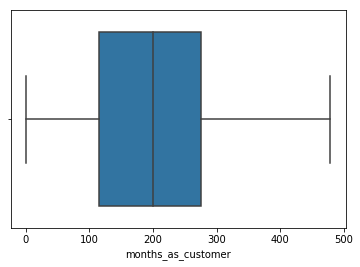

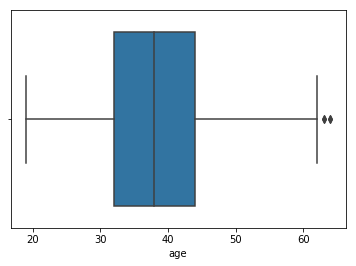

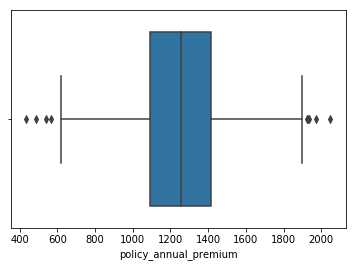

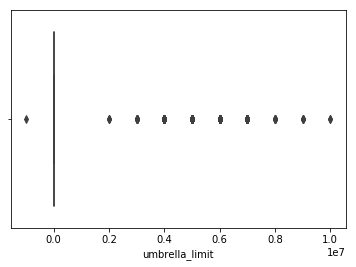

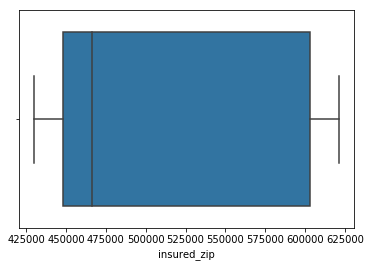

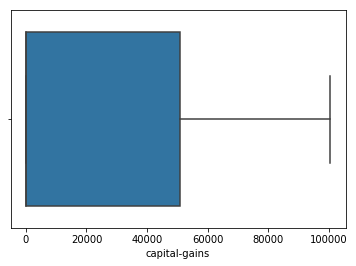

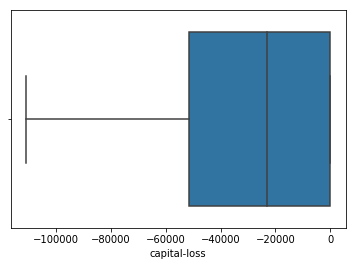

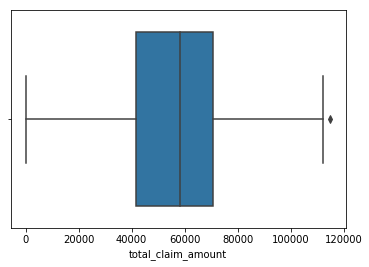

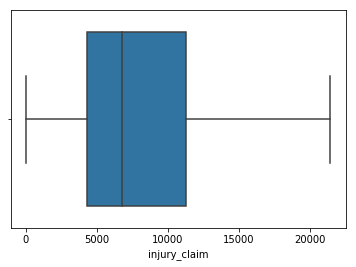

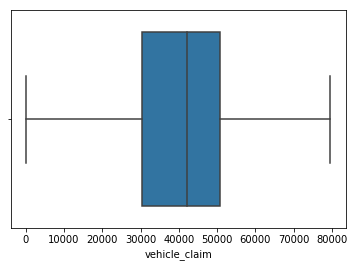

In [129]:
for i in list_conti:
    sns.boxplot(df[i])
    plt.show()

Policy annual premium has outliers(negligible)

umbrella limit values lies outside the Inter quantile ranges

reason is around 80% values are 0

In [131]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [132]:
for i in list_conti:
    print(i)
    print(df[i].skew())

months_as_customer
0.3621768477780205
age
0.47898804709224163
policy_annual_premium
0.004401994526610823
umbrella_limit
1.806712198714504
insured_zip
0.8165539258839357
capital-gains
0.4788502295807907
capital-loss
-0.39147194299389343
total_claim_amount
-0.594581988510234
injury_claim
0.26481087847181833
vehicle_claim
-0.6210979312228687


insured zip , umbrella limit , vehicle claim are slightly skewed

In [134]:
df['insured_zip'] = np.cbrt(df['insured_zip'])

In [140]:
df['umbrella_limit'] = np.cbrt(df['umbrella_limit'])

In [145]:
df['vehicle_claim'] = df['vehicle_claim']**2

In [147]:
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,fraud_reported,incident_date_day,incident_date_month,auto_year_,policy_bind_date_day,policy_bind_date_month,policy_bind_date_year
0,328,48,521585,OH,250/500,1000,1406.91,0.000000,4.264168,MALE,...,2712326400,Saab,92x,1,25,1,1970,17,10,2014
1,228,42,342868,IN,250/500,2000,1197.22,5.550473,4.266242,MALE,...,12320100,Mercedes,E400,1,21,1,1970,27,6,2006
2,134,29,687698,OH,100/300,2000,1413.14,5.550473,4.226801,FEMALE,...,533610000,Dodge,RAM,0,22,2,1970,9,6,2000
3,256,41,227811,IL,250/500,2000,1415.74,5.664061,4.392029,FEMALE,...,2572518400,Chevrolet,Tahoe,1,1,10,1970,25,5,1990
4,228,44,367455,IL,500/1000,1000,1583.91,5.664061,4.394103,MALE,...,20702500,Accura,RSX,0,17,2,1970,6,6,2014


In [148]:
from sklearn.preprocessing import OrdinalEncoder

In [149]:
ord_l = OrdinalEncoder()

Encoding of independent variables

In [150]:
df_n = df.copy()
for i in df.columns:
    if(df[i].dtypes=='O'):
        df_n[i] = ord_l.fit_transform(df[i].values.reshape(-1,1))
    else:
        pass
        

Data after encoding

In [163]:
df_n.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,fraud_reported,incident_date_day,incident_date_month,policy_bind_date_day,policy_bind_date_month,policy_bind_date_year,auto_yr
0,328,48,521585,2.0,1.0,1000,1406.91,0.000000,4.264168,1.0,...,2712326400,10.0,1.0,1,25,1,17,10,2014,2004
1,228,42,342868,1.0,1.0,2000,1197.22,5.550473,4.266242,1.0,...,12320100,8.0,12.0,1,21,1,27,6,2006,2007
2,134,29,687698,2.0,0.0,2000,1413.14,5.550473,4.226801,0.0,...,533610000,4.0,30.0,0,22,2,9,6,2000,2007
3,256,41,227811,0.0,1.0,2000,1415.74,5.664061,4.392029,0.0,...,2572518400,3.0,34.0,1,1,10,25,5,1990,2014
4,228,44,367455,0.0,2.0,1000,1583.91,5.664061,4.394103,1.0,...,20702500,0.0,31.0,0,17,2,6,6,2014,2009


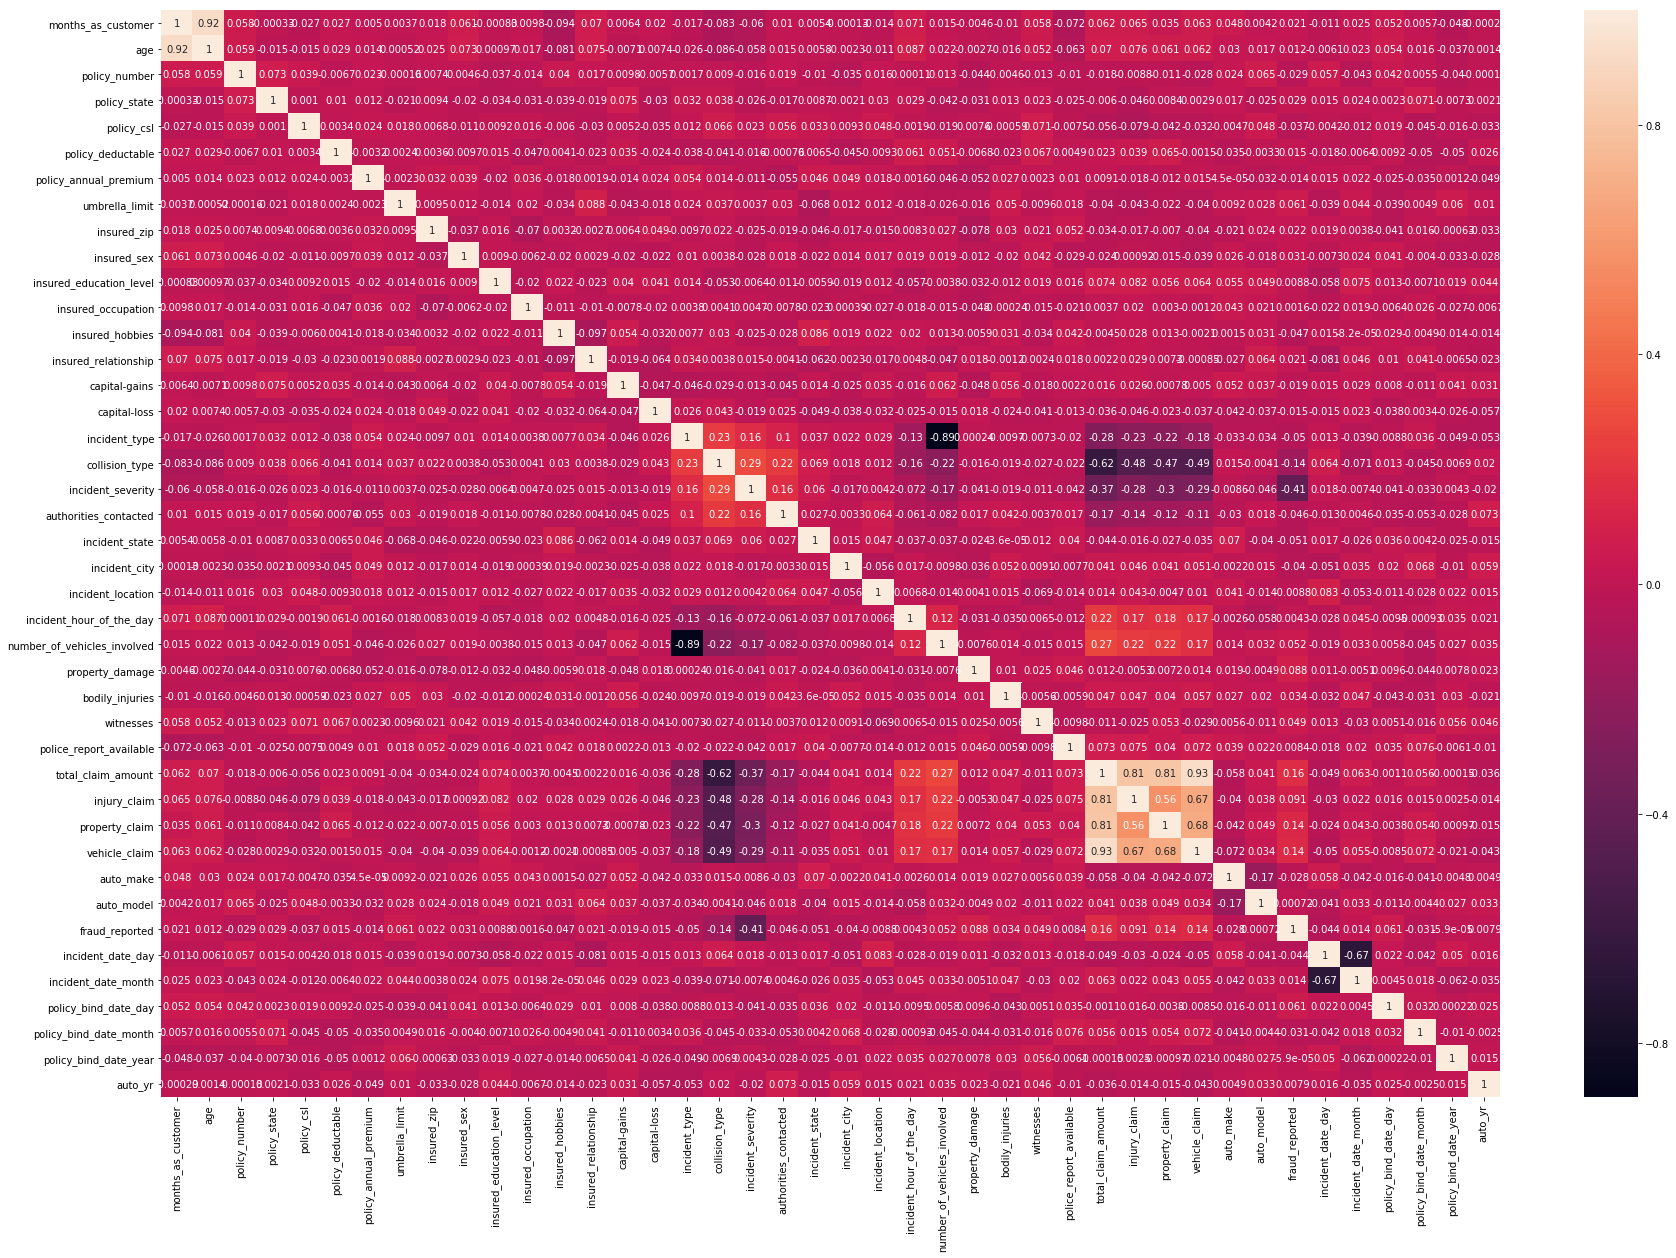

In [167]:
plt.figure(figsize=(30,20))
sns.heatmap(df_n.corr(),annot=True)

fraud_reported shows highest correlation with severity of incident


And least correlated with incident month

Property claim , total claim are highly correlated 

collision type is strongly correlated with vehicle and total claim

In [169]:
from sklearn.preprocessing import StandardScaler

In [170]:
sc = StandardScaler()

In [174]:
df1 =  pd.DataFrame(sc.fit_transform(df_n),columns=df_n.columns)

In [176]:
df1.head() #dataset after scaling

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,fraud_reported,incident_date_day,incident_date_month,policy_bind_date_day,policy_bind_date_month,policy_bind_date_year,auto_yr
0,1.078140,0.990836,-0.095953,1.187173,0.060937,-0.222383,0.616705,-0.497594,-0.465336,1.076953,...,0.722022,0.856466,-1.645743,1.746019,1.141603,-0.735040,0.175451,1.015026,1.684992,-0.183440
1,0.208995,0.334073,-0.791527,-0.016856,0.060937,1.412784,-0.242521,1.972421,-0.433631,1.076953,...,-1.402995,0.360539,-0.657470,1.746019,0.758386,-0.735040,1.305938,-0.164894,0.597550,0.315491
2,-0.608002,-1.088913,0.550566,1.187173,-1.182668,1.412784,0.642233,1.972421,-1.036670,-0.928546,...,-0.992718,-0.631315,0.959702,-0.572731,0.854190,-0.429664,-0.728938,-0.164894,-0.218032,0.315491
3,0.452355,0.224613,-1.239334,-1.220886,0.060937,1.412784,0.652886,2.022968,1.489632,-0.928546,...,0.611987,-0.879279,1.319074,1.746019,-1.157698,2.013343,1.079841,-0.459874,-1.577335,1.479664
4,0.208995,0.552994,-0.695834,-1.220886,1.304542,-0.222383,1.341980,2.022968,1.521339,1.076953,...,-1.396397,-1.623169,1.049545,-0.572731,0.375169,-0.429664,-1.068084,-0.164894,1.684992,0.648112


In [177]:
x = df1.drop('fraud_reported',axis=1)

In [178]:
y = df_n['fraud_reported']

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [182]:
l =  LogisticRegression()

In [183]:
from sklearn.model_selection import train_test_split

In [184]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.40)

In [185]:
l.fit(x_train,y_train)

LogisticRegression()

In [186]:
p = l.predict(x_test)

In [187]:
accuracy_score(p,y_test)

0.7675

Basic model is giving accuracy of 76.7%

In [188]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
algos = [LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier]

In [189]:
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LogisticRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(accuracy_score(pred_test,y_test)*100,1)==round(accuracy_score(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test accuracy',accuracy_score(pred_test,y_test))
        print('train accuracy',accuracy_score(pred_train,y_train))

random state 106
test accuracy 0.793939393939394
train accuracy 0.7940298507462686
random state 144
test accuracy 0.796969696969697
train accuracy 0.7970149253731343
random state 221
test accuracy 0.803030303030303
train accuracy 0.8029850746268656
random state 230
test accuracy 0.803030303030303
train accuracy 0.8029850746268656
random state 241
test accuracy 0.8121212121212121
train accuracy 0.8119402985074626
random state 563
test accuracy 0.7909090909090909
train accuracy 0.7910447761194029
random state 676
test accuracy 0.793939393939394
train accuracy 0.7940298507462686
random state 776
test accuracy 0.8090909090909091
train accuracy 0.808955223880597
random state 853
test accuracy 0.803030303030303
train accuracy 0.8029850746268656


random state 241 is giving best accuracy score

In [190]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=241)

In [191]:
for i in algos:
    obj = i()
    obj.fit(x_train,y_train)
    predict = obj.predict(x_test)
    print(i)
    print('accuracy score',accuracy_score(predict,y_test))
    print(classification_report(predict,y_test))
    print('-------------------')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
accuracy score 0.8121212121212121
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       273
           1       0.46      0.56      0.51        57

    accuracy                           0.81       330
   macro avg       0.68      0.71      0.70       330
weighted avg       0.83      0.81      0.82       330

-------------------
<class 'sklearn.svm._classes.SVC'>
accuracy score 0.796969696969697
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       326
           1       0.04      0.75      0.08         4

    accuracy                           0.80       330
   macro avg       0.52      0.77      0.48       330
weighted avg       0.98      0.80      0.88       330

-------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
accuracy score 0.8
              precision    recall  f1-score   support

           0   

Logistic_regression is giving best accuracy of 81 and then decision tree is giving 80%

In [193]:
from sklearn.model_selection import cross_val_score

In [195]:
for i in algos:
    obj = i()
    obj.fit(x_train,y_train)
    prd = obj.predict(x_test)
    cross_score = cross_val_score(obj,x,y,cv=5)
    print(i)
    print('cross val score',cross_score.mean())
    print('accuracy score',accuracy_score(prd,y_test))
    print('..........................................')

<class 'sklearn.linear_model._logistic.LogisticRegression'>
cross val score 0.7779999999999999
accuracy score 0.8121212121212121
..........................................
<class 'sklearn.svm._classes.SVC'>
cross val score 0.751
accuracy score 0.796969696969697
..........................................
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
cross val score 0.779
accuracy score 0.7909090909090909
..........................................
<class 'sklearn.neighbors._classification.KNeighborsClassifier'>
cross val score 0.718
accuracy score 0.7333333333333333
..........................................


Decision tree is giving best result 

Ensemble techniques

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [199]:
ran_fc = RandomForestClassifier(n_estimators=100)
ran_fc.fit(x_train,y_train)

RandomForestClassifier()

In [200]:
pred_ran = ran_fc.predict(x_test)

In [202]:
print(accuracy_score(pred_ran,y_test))
cross_sc = cross_val_score(ran_fc,x,y,cv=5)
print(cross_sc.mean())

0.796969696969697
0.763


Random forest is giving same accuracy as decision tree

In [203]:
list_en = [AdaBoostClassifier,GradientBoostingClassifier]

In [204]:
for i in list_en:
    obj = i(n_estimators=100)
    obj.fit(x_train,y_train)
    p=obj.predict(x_test)
    cv_sc = cross_val_score(obj,x,y,cv=5)
    print(i)
    print('accuracy score',accuracy_score(p,y_test))
    print('cross score',cv_sc.mean())

<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
accuracy score 0.8090909090909091
cross score 0.78
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
accuracy score 0.8393939393939394
cross score 0.8230000000000001


Gradient boosting is giving better result than random forest with 83% of accuracy

Therefore moving for the hyper parametric tuning of gradient boosting

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
parameters = {
    'n_estimators':[100,300,500],
    'max_depth':[5,6,8],
    'min_samples_split':[50,100]
}

In [208]:
gb_ = GradientBoostingClassifier()

In [210]:
grid_obj_gb = GridSearchCV(gb_,parameters,cv=5)

In [211]:
grid_obj_gb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [5, 6, 8], 'min_samples_split': [50, 100],
                         'n_estimators': [100, 300, 500]})

In [212]:
print(grid_obj_gb.best_params_)
print(grid_obj_gb.best_score_)

{'max_depth': 8, 'min_samples_split': 50, 'n_estimators': 100}
0.8388059701492537


Above is the best hyper parameters and accuracy score

Fitting the model with best parameters

In [213]:
gb_best = GradientBoostingClassifier(n_estimators=100,min_samples_split=50,max_depth=8)

In [215]:
gb_best.fit(x_train,y_train)
pred_gb_best = gb_best.predict(x_test)

# Accuracy score of final model is 84.8%

In [216]:
accuracy_score(pred_gb_best,y_test)

0.8484848484848485

In [225]:
print('accuracy_score : ',accuracy_score(pred_gb_best,y_test))
con_mat=  confusion_matrix(pred_gb_best,y_test)
print(classification_report(pred_gb_best,y_test))

accuracy_score :  0.8484848484848485
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       253
           1       0.70      0.62      0.66        77

    accuracy                           0.85       330
   macro avg       0.79      0.77      0.78       330
weighted avg       0.84      0.85      0.85       330



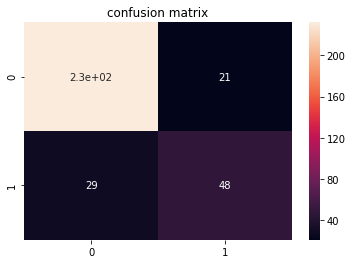

In [227]:
plt.title('confusion matrix')
sns.heatmap(con_mat,annot=True)

Saving the model

In [228]:
import pickle

In [231]:
insurance_fraud = 'insurance.pkl'
pickle.dump(gb_best,open(insurance_fraud,'wb'))

# Conclusion

In [241]:
original_res = np.array(y_test)
pred_res = np.array(gb_best.predict(x_test))
df_comparison = pd.DataFrame({'original':pred_res,'predicted':pred_res})
df_comparison

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
325,0,0
326,0,0
327,0,0
328,0,0


In [236]:
y_test.value_counts() # actual data value counts

0    261
1     69
Name: fraud_reported, dtype: int64

In [239]:
predicted_val = pd.DataFrame(pred_gb_best) #predicted values counts

In [240]:
predicted_val.value_counts() # type 1 error is there(false rejection of true negative value)

0    253
1     77
dtype: int64